In [1]:
def plot_pain_regions(data,ax=None,title = None):
    upper_left = data["ESM_ABDPAIN_LHR"].sum()
    upper_middle = data["ESM_ABDPAIN_EGR"].sum()
    upper_right = data["ESM_ABDPAIN_RHR"].sum()

    middle_left = data["ESM_ABDPAIN_RLR"].sum()
    middle_middle = data["ESM_ABDPAIN_UR"].sum()
    middle_right = data["ESM_ABDPAIN_LLR"].sum()

    bottom_left = data["ESM_ABDPAIN_RIR"].sum()
    bottom_middle = data["ESM_ABDPAIN_HR"].sum()
    bottom_right = data["ESM_ABDPAIN_LIR"].sum()

    regions = [[upper_left,upper_middle,upper_right],
          [middle_left,middle_middle,middle_right],
          [bottom_left,bottom_middle,bottom_right]]
    regions = np.array(regions)
    regions = np.fliplr(regions)
    regions_ = []
    for li in regions:
        for el in li:
            regions_.append(el)
    regions = np.array(regions_)

    plt.rcParams["axes.grid"] = False
    if ax == None:
        fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax.imshow(plt.imread("torso.jpg"))

    normal = pl.Normalize(regions.min(), regions.max())
    colors = pl.cm.RdYlGn_r(normal(regions))

    x0 = 325
    x=x0
    y = 550
    step = 120
    for obj in colors:
        ax.add_patch(patches.Rectangle((x,y),step,step,alpha=0.5,facecolor=obj))
        x+=120
        if x >= x0+step*3:
            y += step
            x = x0
    if title == None:
        ax.title.set_text('Pain by region (counts)');
    else:
        ax.title.set_text(title);
    

In [2]:
import pandas as pd
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import numpy as np
pd.options.display.max_seq_items = 200
pd.set_option('mode.chained_assignment', None)
%matplotlib inline

In [3]:
df = pd.read_csv("../data/raw.csv",parse_dates=["ESM_START","ESM_END","Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Columns: 142 entries, REGISTRATION_ID to CENTER_recode
dtypes: float64(119), int64(3), object(20)
memory usage: 3.8+ MB


In [4]:
df.isna().sum().sum()/df.count().sum()

0.44451332562504864

In [5]:
df.columns

Index(['REGISTRATION_ID', 'DAY', 'CENTER', 'X...SUBJECT_ID', 'PrimaryLast',
       'h_dubbel', 'CRF_age', 'CRF_sex', 'SURVEY_ID', 'MEASUREMENT_MOMENT',
       'BEEPCOUNT_DAY', 'BEEPS_NUMBER_DAY', 'filter_ESMprotocolvalid_.',
       'BEEPCOUNT_TOTAL', 'ESM_ABDPAIN', 'lag_AP', 'change_AP', 'ESM_START',
       'ESM_ABDPAIN_LOC', 'ESM_ABDPAIN_RHR', 'ESM_ABDPAIN_EGR',
       'ESM_ABDPAIN_LHR', 'ESM_ABDPAIN_RLR', 'ESM_ABDPAIN_UR',
       'ESM_ABDPAIN_LLR', 'ESM_ABDPAIN_RIR', 'ESM_ABDPAIN_HR',
       'ESM_ABDPAIN_LIR', 'ESM_GAS1', 'ESM_GAS2', 'ESM_RUMB', 'ESM_BLOAT1',
       'ESM_BLOAT2', 'ESM_BLOAT3', 'ESM_URGE', 'ESM_SICK', 'ESM_BURP',
       'ESM_HEARTBURN', 'ESM_FULL', 'ESM_DEF_URGE', 'ESM_DEF_FREQ', 'ESM_BSFS',
       'ESM_STRAIN', 'ESM_DEF_EMPTY', 'ESM_PALP', 'ESM_SWEAT', 'ESM_DYSPNEA',
       'ESM_DIZZY', 'ESM_MUSCLES', 'ESM_JOINTS', 'ESM_URI', 'ESM_GOOD',
       'ESM_LOW', 'ESM_ANXIOUS', 'ESM_IRRITATED', 'ESM_STRESSED',
       'ESM_RELAXED', 'ESM_WORRIED', 'ESM_LOCATION', 'ESM_ACTIVIT

# Patient Data

In [6]:
crf_columns = [el for el in df.columns if "CRF" in el and el != 'CRF_IBS_subtypecalc']
patient_data = df.groupby("X...SUBJECT_ID").mean()
patient_data = patient_data[crf_columns]
print(patient_data.isna().sum())
patient_data.dropna(inplace=True)
print()
print(patient_data.head())

CRF_age    0
CRF_sex    0
CRF_BMI    0
dtype: int64

                CRF_age  CRF_sex  CRF_BMI
X...SUBJECT_ID                           
428.0              34.0      0.0    24.59
431.0              21.0      1.0    22.68
432.0              21.0      1.0    20.55
436.0              34.0      0.0    26.40
437.0              20.0      1.0    19.85


In [7]:
pd.concat([patient_data.drop("CRF_sex",axis=1).describe(),patient_data[patient_data["CRF_sex"]==0].drop("CRF_sex",axis=1).describe(),patient_data[patient_data["CRF_sex"]==1].drop("CRF_sex",axis=1).describe()],axis=1)

,CRF_age,CRF_BMI,CRF_age,CRF_BMI,CRF_age,CRF_BMI
count,73.000000,73.000000,23.000000,23.000000,50.000000,50.000000
mean,33.958904,24.458082,40.782609,25.687391,30.820000,23.892600
std,14.328912,5.308319,12.184030,3.301789,14.252375,5.956044
min,19.000000,18.170000,25.000000,20.830000,19.000000,18.170000
25%,22.000000,20.830000,32.500000,23.740000,21.000000,20.102500
50%,28.000000,23.780000,38.000000,24.930000,23.000000,22.170000
75%,45.000000,25.770000,47.000000,28.390000,33.500000,24.945000
max,69.000000,49.540000,67.000000,31.350000,69.000000,49.540000


In [8]:
means = pd.concat([patient_data.drop("CRF_sex",axis=1).mean(),patient_data[patient_data["CRF_sex"]==0].drop("CRF_sex",axis=1).mean(),patient_data[patient_data["CRF_sex"]==1].drop("CRF_sex",axis=1).mean()],axis=1)
means = pd.concat([means,pd.DataFrame([[42.6,41.5,43.6]]),pd.DataFrame([[25.4,25.9,25]])])
std = pd.concat([patient_data.drop("CRF_sex",axis=1).std(),patient_data[patient_data["CRF_sex"]==0].drop("CRF_sex",axis=1).std(),patient_data[patient_data["CRF_sex"]==1].drop("CRF_sex",axis=1).std()],axis=1)
means = pd.concat([means,std])
means.index=["Sample Age Mean","Sample BMI Mean", "Netherlands Age Mean","Netherlands BMI Mean","Sample Age Deviation", "Sample BMI Deviation"]
means.columns = ["Population","Male","Female"]
means = means.reindex(["Sample Age Mean","Netherlands Age Mean", "Sample Age Deviation", "Sample BMI Mean", "Netherlands BMI Mean","Sample BMI Deviation"])
pd.options.display.float_format = '{:,.1f}'.format
means

,Population,Male,Female
Sample Age Mean,34.0,40.8,30.8
Netherlands Age Mean,42.6,41.5,43.6
Sample Age Deviation,14.3,12.2,14.3
Sample BMI Mean,24.5,25.7,23.9
Netherlands BMI Mean,25.4,25.9,25.0
Sample BMI Deviation,5.3,3.3,6.0


Patient data by sex, age and BMI. Averages for every gender and the whole Netherlands are provided.
Most patients are female. The BMI of these is way below the average dutch BMI for females. The age distribution for these is also strongly skewed to the left.

Source: https://en.wikipedia.org/wiki/List_of_countries_by_body_mass_index

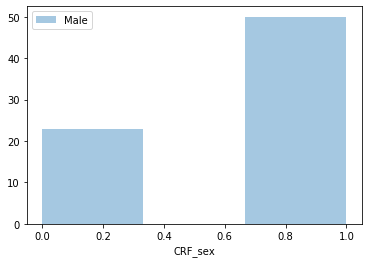

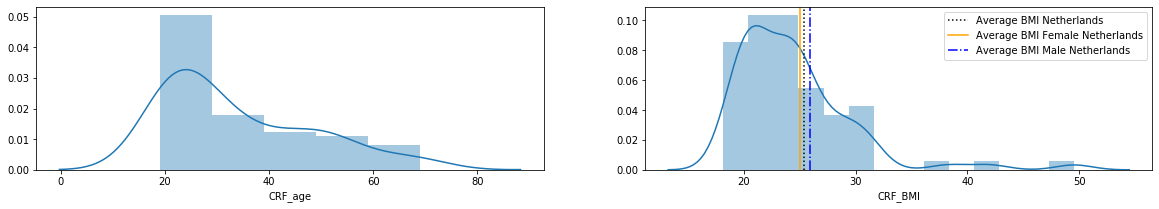

In [9]:
sns.distplot(patient_data["CRF_sex"],kde=False,label=["Male","Female"])
plt.legend()

fig,ax = plt.subplots(1,2,figsize=(20,3))
sns.distplot(patient_data["CRF_age"],ax=ax[0])
sns.distplot(patient_data["CRF_BMI"],ax=ax[1])
ax[1].axvline(25.4,0,10,color="k",linestyle=":")
ax[1].axvline(25,0,10,color="orange",linestyle="-")
ax[1].axvline(25.9,0,10,color="blue",linestyle="-.")
ax[1].legend(["Average BMI Netherlands","Average BMI Female Netherlands","Average BMI Male Netherlands"])

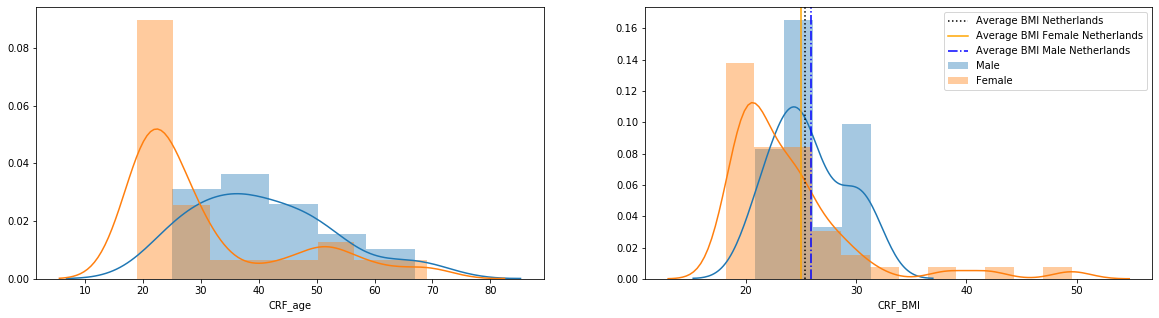

In [10]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.distplot(patient_data[patient_data["CRF_sex"]==0]["CRF_age"],ax=ax[0])
sns.distplot(patient_data[patient_data["CRF_sex"]==1]["CRF_age"],ax=ax[0])

sns.distplot(patient_data[patient_data["CRF_sex"]==0]["CRF_BMI"],ax=ax[1])
sns.distplot(patient_data[patient_data["CRF_sex"]==1]["CRF_BMI"],ax=ax[1])

ax[1].axvline(25.4,0,10,color="k",linestyle=":")
ax[1].axvline(25,0,10,color="orange",linestyle="-")
ax[1].axvline(25.9,0,10,color="blue",linestyle="-.")
ax[1].legend(["Average BMI Netherlands","Average BMI Female Netherlands","Average BMI Male Netherlands","Male","Female"])

In [11]:
df["X...SUBJECT_ID"].nunique()

73

<Figure size 1440x1440 with 0 Axes>

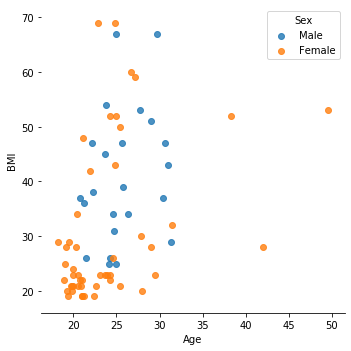

In [12]:
plt.figure(figsize=(20,20))
lm = sns.lmplot(data = patient_data, hue="CRF_sex",y="CRF_age",x="CRF_BMI",fit_reg=False,legend=False)
lm.despine(left=True)
ax = lm.axes[0,0]
ax.set_xlabel("Age")
ax.set_ylabel("BMI")
lg = plt.legend(["Male","Female"],loc="upper right")
lg.set_title("Sex")

# ESM Data

In [13]:
esm_columns = [col for col in df.columns if "ESM" in col and col != "filter_ESMprotocolvalid_."]
esm_data = df[esm_columns]
esm_data.head()

,ESM_ABDPAIN,ESM_START,ESM_ABDPAIN_LOC,ESM_ABDPAIN_RHR,ESM_ABDPAIN_EGR,ESM_ABDPAIN_LHR,ESM_ABDPAIN_RLR,ESM_ABDPAIN_UR,ESM_ABDPAIN_LLR,ESM_ABDPAIN_RIR,...,ESM_MED_OTHER,ESM_END,ESM_MORN_SLEEP,ESM_MORN_START,ESM_MORN_WAKEUP,ESM_MORN_AWAKE,ESM_MORN_WELL,ESM_MORN_RESTED,ESM_MORN_ABD,ESM_MORN_END
0,2.0,6/21/2017 9:26:15,nan,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,nan,6/21/2017 9:28:20,nan,nan,nan,nan,nan,nan,nan,nan
1,4.0,6/21/2017 10:39:13,nan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,nan,6/21/2017 10:40:56,nan,nan,nan,nan,nan,nan,nan,nan
2,4.0,6/21/2017 12:23:09,nan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,nan,6/21/2017 12:24:25,nan,nan,nan,nan,nan,nan,nan,nan
3,7.0,6/21/2017 13:39:36,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,nan,6/21/2017 13:40:57,nan,nan,nan,nan,nan,nan,nan,nan
4,9.0,6/21/2017 16:11:07,nan,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,nan,6/21/2017 16:12:53,nan,nan,nan,nan,nan,nan,nan,nan


Analysis of NaN values. For each feature where more than 75% is available, we impute zeros. Otherwise we drop the column.

In [14]:
esm_data = esm_data.loc[:,esm_data.isna().sum() <= len(esm_data)*0.75]
esm_data.fillna(0.,inplace=True)

PCA - 3D Visualization of high dimensional data

Explained Variance:  [0.16480681 0.0668387  0.04728377]


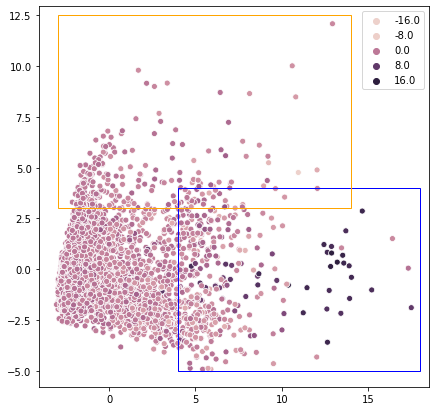

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

esm_no_date_pd = esm_data.select_dtypes(exclude=["O","object"])
esm_no_date = esm_no_date_pd
esm_no_date_columns = esm_no_date.columns

ss = StandardScaler()
esm_no_date = ss.fit_transform(esm_no_date.values)

pca = PCA(n_components=3)
esm_pca = pca.fit_transform(esm_no_date)
print("Explained Variance: ",pca.explained_variance_ratio_)

fig, ax = plt.subplots(1,1,figsize=(7,7))
sns.scatterplot(esm_pca[:,0],esm_pca[:,1],hue=esm_pca[:,2])
ax.add_patch(patches.Rectangle((4,-5),14,9,linewidth=1,edgecolor='b',facecolor='none'));
ax.add_patch(patches.Rectangle((-3,3),17,9.5,linewidth=1,edgecolor='orange',facecolor='none'));

Some outliers can be found in the blue rectangle. Further analysis reveals these have especially high abdominal pain, and the location of pain differs from the normal regions. However, combining these with the patient data, we can quickly eliminate these datapoints: they belong to a single patient, who therefore seems to be an outlier.

(33, 60)


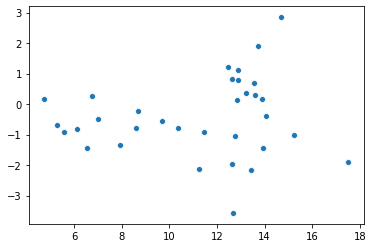

In [16]:
esm_traceback_idx = [idx for idx,el in enumerate(esm_pca) if el[0]>4 and el[1]<5 and el[2]>7]
esm_traceback_el = np.array([el for idx,el in enumerate(esm_pca) if el[0]>4 and el[1]<5 and el[2]>7])
esm_traceback = esm_data.iloc[esm_traceback_idx]
esm_traceback_df = df.iloc[esm_traceback_idx]

sns.scatterplot(esm_traceback_el[:,0],esm_traceback_el[:,1])
print(esm_traceback.shape)

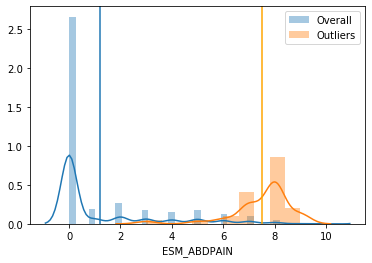

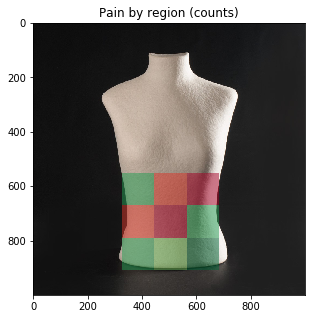

In [17]:
fig, ax = plt.subplots(1,1)
sns.distplot(esm_data["ESM_ABDPAIN"],label="Overall")
sns.distplot(esm_traceback["ESM_ABDPAIN"],label="Outliers")
ax.axvline(esm_data["ESM_ABDPAIN"].mean(),0,10)
ax.axvline(esm_traceback["ESM_ABDPAIN"].mean(),0,10,c="orange")
plt.legend()
plot_pain_regions(esm_traceback)

In [18]:
print(esm_traceback_df["X...SUBJECT_ID"].describe())
print(esm_traceback_df["X...SUBJECT_ID"].nunique())

count    33.0
mean    593.1
std      11.1
min     531.0
25%     595.0
50%     595.0
75%     595.0
max     595.0
Name: X...SUBJECT_ID, dtype: float64
2


(59, 60)


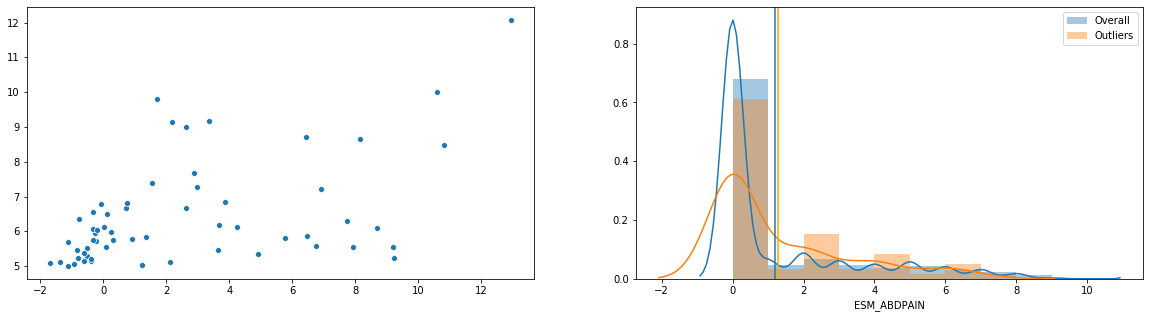

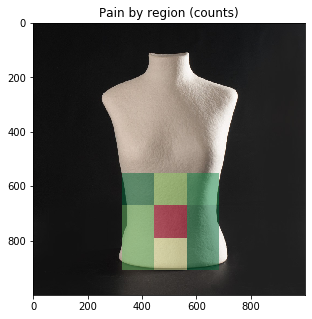

In [19]:
esm_traceback_idx = [idx for idx,el in enumerate(esm_pca) if el[1]>5]
esm_traceback_el = np.array([el for idx,el in enumerate(esm_pca) if el[1]>5])
esm_traceback = esm_data.iloc[esm_traceback_idx]
esm_traceback_df = df.iloc[esm_traceback_idx]

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(esm_traceback_el[:,0],esm_traceback_el[:,1],ax=ax[0])
print(esm_traceback.shape)

sns.distplot(esm_data["ESM_ABDPAIN"],label="Overall",ax=ax[1],bins=[0,1,2,3,4,5,6,7,8,9,10])
sns.distplot(esm_traceback["ESM_ABDPAIN"],label="Outliers",ax=ax[1],bins=[0,1,2,3,4,5,6,7,8,9,10])
ax[1].axvline(esm_data["ESM_ABDPAIN"].mean(),0,10)
ax[1].axvline(esm_traceback["ESM_ABDPAIN"].mean(),0,10,c="orange")
plt.legend()
plot_pain_regions(esm_traceback)

These outliers belong to 21 different patients, with a total of 21 recordings.

Male patients:  13
Female patients:  46
Sum:  59
Unique patients:  21


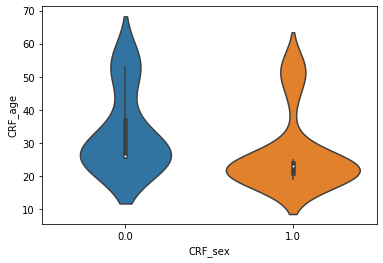

In [20]:
sns.violinplot(data=esm_traceback_df,y="CRF_age",x="CRF_sex")
print("Male patients: ",esm_traceback_df[esm_traceback_df["CRF_sex"]==0]["X...SUBJECT_ID"].count())
print("Female patients: ",esm_traceback_df[esm_traceback_df["CRF_sex"]==1]["X...SUBJECT_ID"].count())
print("Sum: ",esm_traceback_df["X...SUBJECT_ID"].count())

print("Unique patients: ",esm_traceback_df["X...SUBJECT_ID"].nunique())

Evaluating Pain

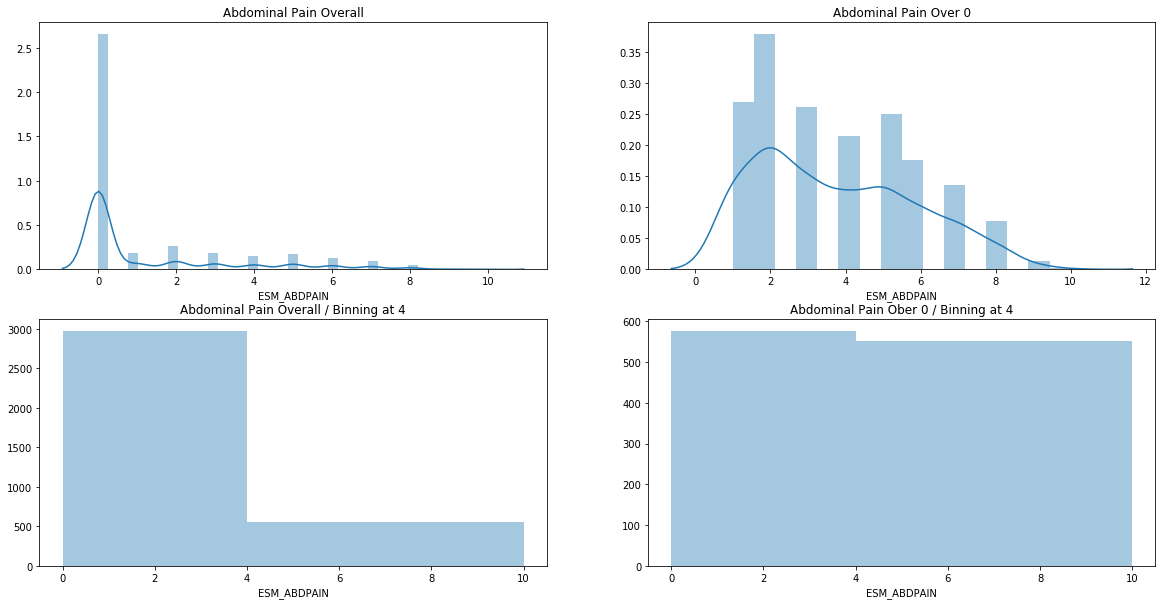

In [21]:
fig, ax = plt.subplots(2,2,figsize=(20,10))

ax[0][0].set_title("Abdominal Pain Overall")
ax[0][1].set_title("Abdominal Pain Over 0")
ax[1][0].set_title("Abdominal Pain Overall / Binning at 4")
ax[1][1].set_title("Abdominal Pain Ober 0 / Binning at 4")

sns.distplot(esm_data["ESM_ABDPAIN"],ax=ax[0][0])
sns.distplot(esm_data[esm_data["ESM_ABDPAIN"]>0]["ESM_ABDPAIN"],ax=ax[0][1])

sns.distplot(esm_data["ESM_ABDPAIN"], bins=[0,4,10],ax=ax[1][0], kde=False)
sns.distplot(esm_data[esm_data["ESM_ABDPAIN"]>0]["ESM_ABDPAIN"], bins = [0,4,10],ax=ax[1][1], kde=False)

Overall regions of pain.

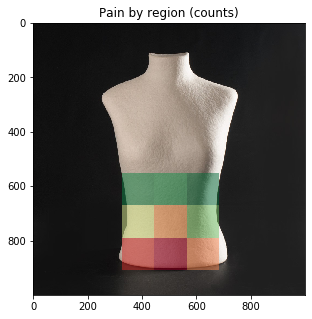

In [22]:
plot_pain_regions(esm_data)

# Feature Selection
Next we are trying to predict the overall abdominal pain. We therefore need to exclude the local pain measures.

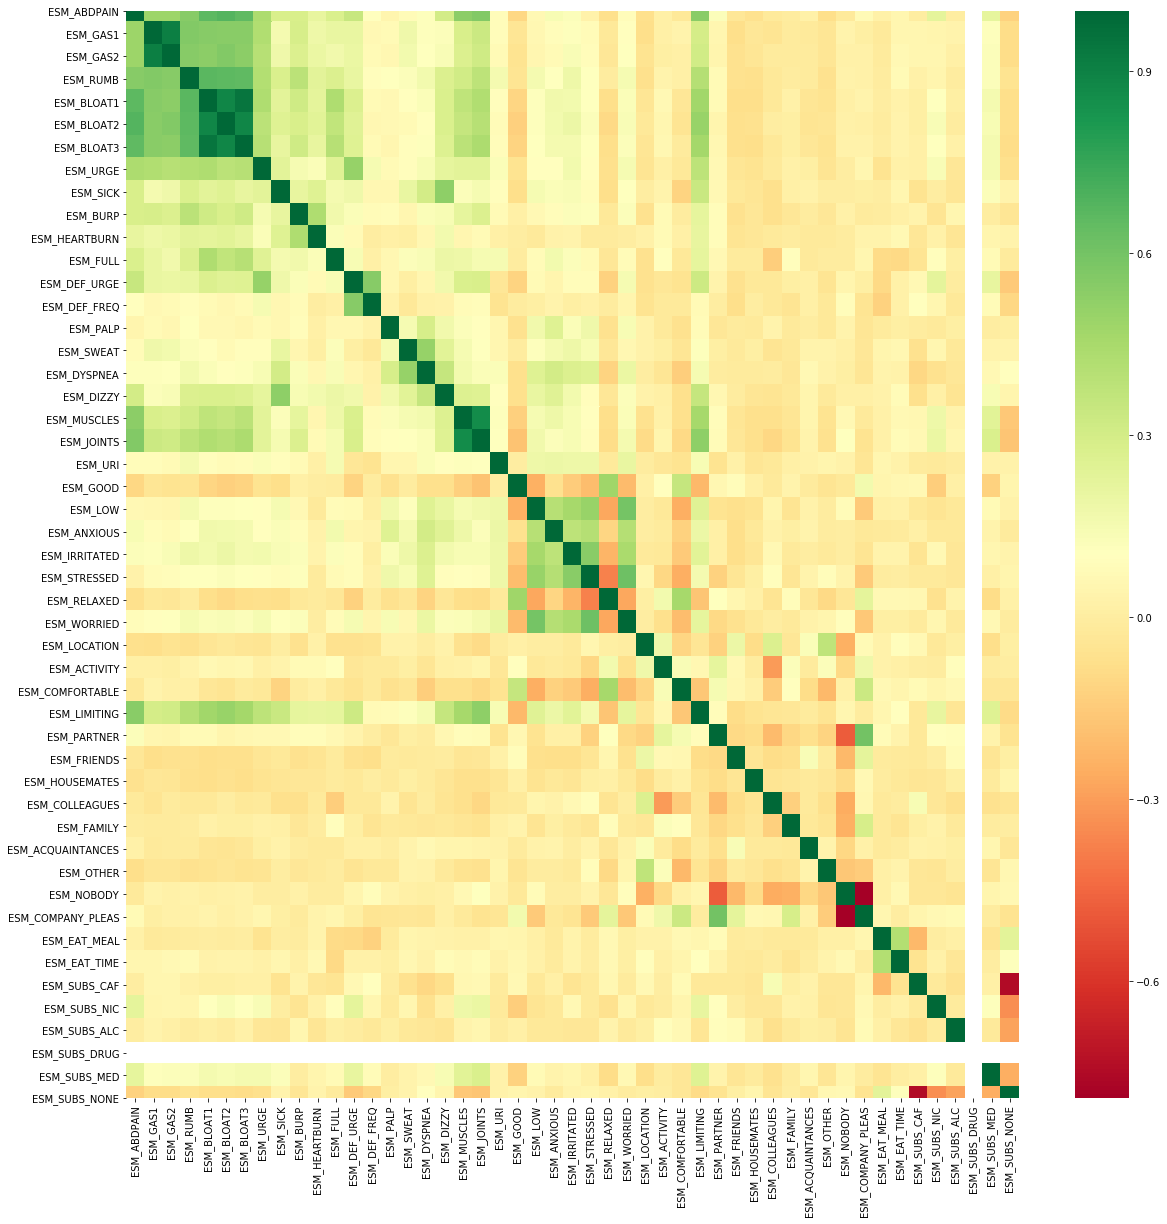

In [23]:
esm_no_date_pd.drop(["ESM_ABDPAIN_RHR","ESM_ABDPAIN_EGR","ESM_ABDPAIN_LHR",
                     "ESM_ABDPAIN_RLR","ESM_ABDPAIN_UR","ESM_ABDPAIN_LLR",
                    "ESM_ABDPAIN_RIR","ESM_ABDPAIN_HR","ESM_ABDPAIN_LIR"],axis=1,inplace=True)

fig,ax = plt.subplots(1,1,figsize=(20,20))
cor = esm_no_date_pd.corr()
sns.heatmap(cor,cmap=pl.cm.RdYlGn)

The correlation matrix shows that there is some positive correlation between abdominal pain the three bloating types.

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.022094
Best score using built-in LassoCV: 0.634617
Lasso picked 31 variables and eliminated the other 17 variables


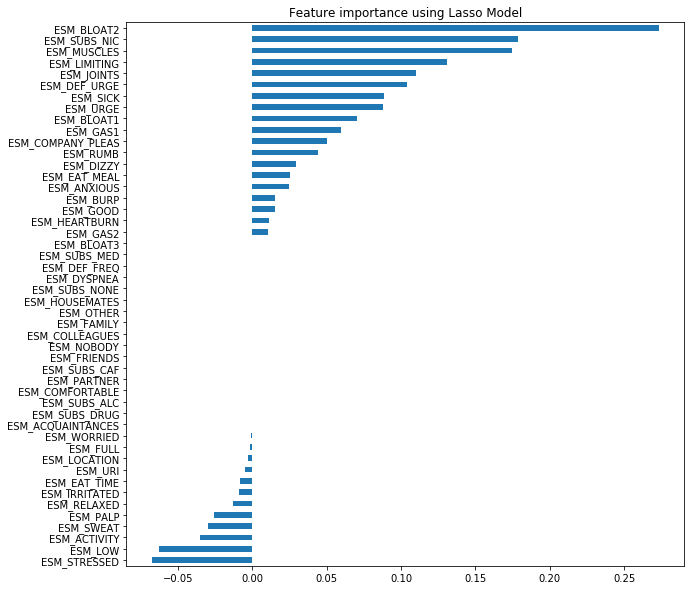

In [24]:
from sklearn.linear_model import LassoCV
X = esm_no_date_pd.drop("ESM_ABDPAIN",axis=1)
y = esm_no_date_pd["ESM_ABDPAIN"]

reg = LassoCV()
reg.fit(X,y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = coef.sort_values()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 10)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model");

Lasso also seems to favor Bloating, especially Bloating 2, as a feature to predict pain. Muscles, Joiunts and such are also included, like in the correlation heatmap. Surprisingly, Bloating 3 is comepletely excluded.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("Overall size: ", len(X))
print("Training on ",len(X_train)," samples")
print("Validating on ",len(X_test)," samples")

Overall size:  3528
Training on  2363  samples
Validating on  1165  samples


In [26]:
print("Lasso:")
reg = LassoCV(random_state=42)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R-Squared score: ", r2_score(y_test,y_pred))

print("\nElasticNet:")
from sklearn.linear_model import ElasticNet
reg = ElasticNet(random_state=42)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R-Squared score: ", r2_score(y_test,y_pred))

print("\nDecision Trees:")
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R-Squared score: ", r2_score(y_test,y_pred))

Lasso:
R-Squared score:  0.5945250010098874

ElasticNet:
R-Squared score:  0.5502567054739895

Decision Trees:
R-Squared score:  0.38708310739804297


/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Clustering

We cluster the data for feature extraction. We use the elbow method.

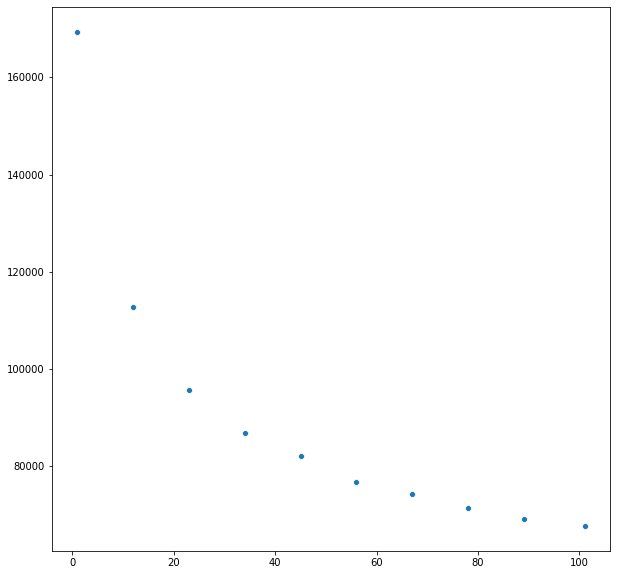

In [27]:
from sklearn.cluster import KMeans

esm_no_date_pd_ss = StandardScaler().fit_transform(esm_no_date_pd)

inertia = []
range_ = np.int32(np.linspace(1,101,10))
for k in range_:
    clu = KMeans(k,random_state=42,init="random")
    clu.fit(esm_no_date_pd_ss)
    inertia.append(clu.inertia_)
    
sns.scatterplot(range_,inertia)

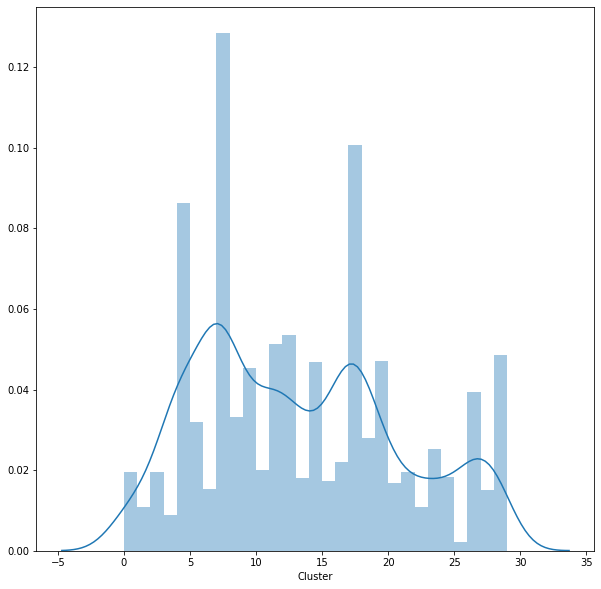

In [28]:
k=30
clu = KMeans(k,init="random")
esm_clu = esm_data.copy()
esm_clu["Cluster"] = clu.fit_predict(esm_no_date_pd_ss)
sns.distplot(esm_clu["Cluster"],bins = [el for el in range(0,k)])

Using 30 clusters we now output the pain regions of each cluster, and how much the correlations differ from the data population.

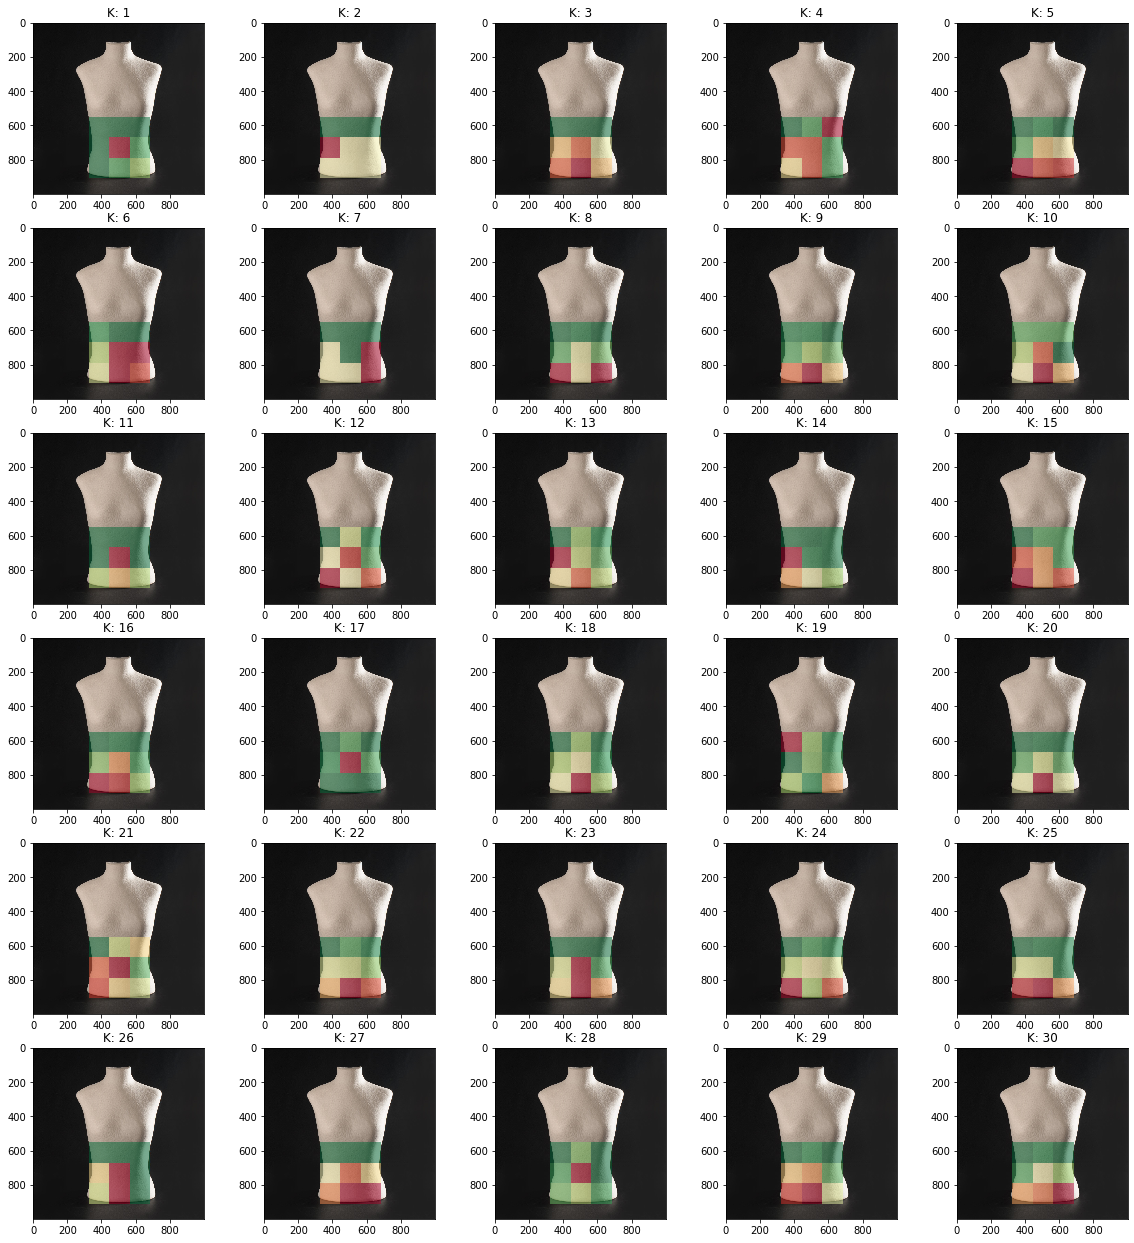

In [29]:
bins = [el for el in range(0,11)]

fig , ax = plt.subplots(int(k/5),5,figsize=(20,22))
for k_ in range(0,k):
    t = "K: "+str(k_+1)
    plot_pain_regions(esm_clu[esm_clu["Cluster"] == k_],ax=ax.reshape(-1)[k_],title=t)

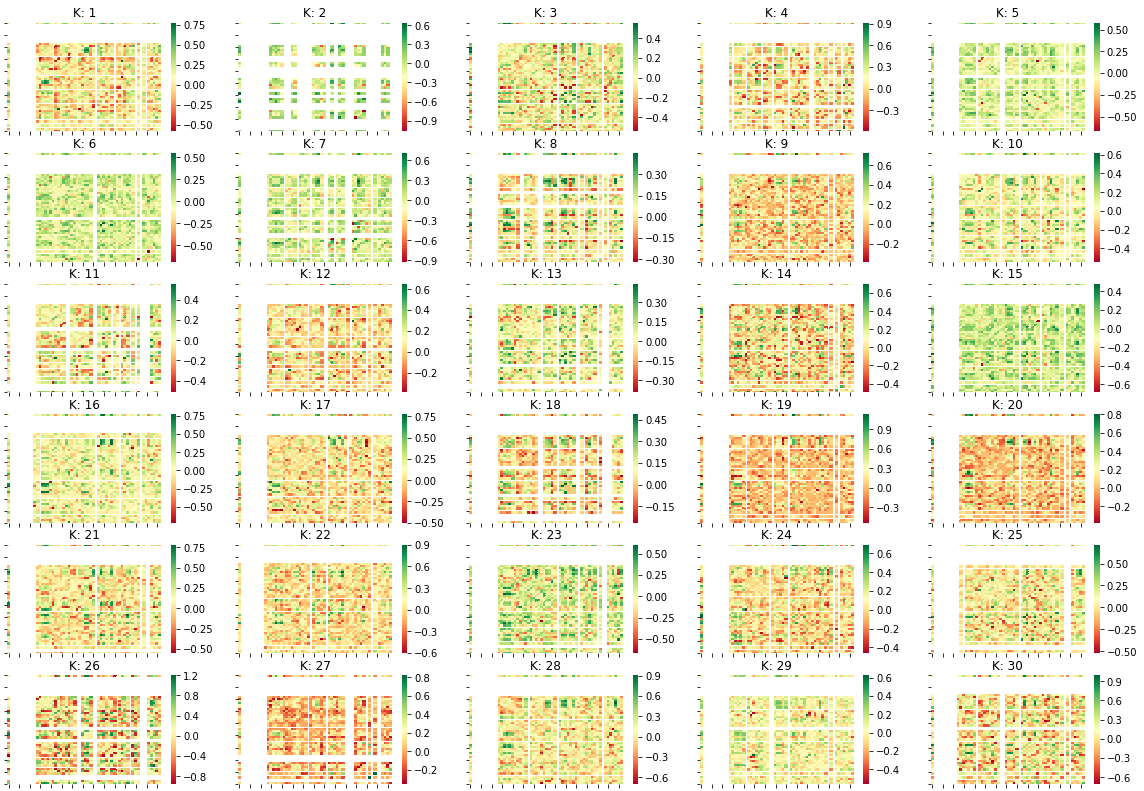

In [30]:
fig , ax = plt.subplots(int(k/5),5,figsize=(20,14))
for k_ in range(0,k):
    a = ax.reshape(-1)[k_]
    cor_ = cor - esm_data[esm_clu["Cluster"]==k_].corr()
    sns.heatmap(cor_,cmap=pl.cm.RdYlGn,ax=a,annot=False)
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_title("K: "+str(k_+1))